In [6]:
from os.path import join, isdir
from os import sep, getcwd, chdir
from ExperimentSettings import EXPERIMENT_SETTINGS
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm.autonotebook import tqdm

In [7]:
import networkx as nx
from os.path import join
import json
import numpy as np

In [8]:
from networkx.generators.random_graphs import barabasi_albert_graph, erdos_renyi_graph


In [33]:
def _get_avg_degree(g,):
    output = 2 * len(g.edges()) / len(g.nodes())
    return output

In [68]:
def _get_avg_degree_with_inter_p(g,inter_p):
    output = 2 *(
        len(g.edges()) # num edges from erdos reyini
        + inter_p * len(g.nodes())  # num edges from prefernrtial
    ) / len(g.nodes())
    return output

In [80]:
def edges_with_inter_p(g, inter_p):
    return len(g.edges()) + inter_p * len(g.nodes())

In [54]:
output = {}

for n in tqdm(range(10, 111, 10)):
    output[n] = {}
    
    for p in np.arange(0.05, 1.05, 0.05):
        #output[n][p] = {'avg_deg1': [], 'avg_deg2': []}

        for i in range(0, 50):
            g = erdos_renyi_graph(n, p)
            #output[n][p]['avg_deg1'].append(_get_avg_degree(g))
            #output[n][p]['avg_deg2'].append(_get_avg_degree_2(g))
            output[n][p]=_get_avg_degree_2(g)

        #output[n][p]['avg_deg1'] = np.mean(output[n][p]['avg_deg1'])
        #output[n][p]['avg_deg2'] = np.mean(output[n][p]['avg_deg2'])

  0%|          | 0/11 [00:00<?, ?it/s]

In [88]:
output = {}
i=0
for n in tqdm(range(10, 111, 10)):
    for p in np.arange(0.05, 1.05, 0.05):
        for inter_p in np.arange(0.05, 0.45, 0.05):
            temp_e = []
            temp_e_with_inter_p = []
            temp_avg_deg = []
            temp_avg_deg_with_inter_p = []
            for confidence in range(0, 50):
                g = erdos_renyi_graph(n, p)
                temp_e.append(len(g.edges()))
                temp_e_with_inter_p.append(edges_with_inter_p(g, inter_p))
                temp_avg_deg.append(_get_avg_degree_2(g))
                temp_avg_deg_with_inter_p.append(_get_avg_degree_with_inter_p(g, inter_p))
            output[i] = {
                'anom_comm_size': n,
                'anom_m': p,
                'anom_inter_p': inter_p,
                'edges': np.mean(temp_e),
                'edges_with_interconnections': np.mean(temp_e_with_inter_p),
                'avg_deg': np.mean(temp_avg_deg),
                'avg_deg_with_interconnections': np.mean(temp_avg_deg_with_inter_p)}
            i+=1

        #output[n][p]['avg_deg1'] = np.mean(output[n][p]['avg_deg1'])
        #output[n][p]['avg_deg2'] = np.mean(output[n][p]['avg_deg2'])

  0%|          | 0/11 [00:00<?, ?it/s]

In [108]:
def expected_acg_deg_with_interconnections(anom_size, anom_m, anom_inter_p):
    return 2 * (anom_m * anom_size *(anom_size-1) / 2 + anom_inter_p * anom_size) / anom_size

In [111]:
expected_acg_deg_with_interconnections(30, 0.4, 0.05)

11.7

In [89]:
df = pd.DataFrame.from_dict(output, orient='index')

In [ ]:
2 (anom_m * anom_size *(anom_size-1) / 2 + inter_p * anom_size / anom_size)

In [106]:
2 * (0.8 * 40 * 39 / 2 + 0.05 * 40) / 40

31.3

In [100]:
df.loc[df['anom_comm_size']==30]

,anom_comm_size,anom_m,anom_inter_p,edges,edges_with_interconnections,avg_deg,avg_deg_with_interconnections
320,30,0.05,0.05,21.32,22.82,1.421333,1.521333
321,30,0.05,0.10,21.22,24.22,1.414667,1.614667
322,30,0.05,0.15,21.42,25.92,1.428000,1.728000
323,30,0.05,0.20,21.86,27.86,1.457333,1.857333
324,30,0.05,0.25,23.12,30.62,1.541333,2.041333
325,30,0.05,0.30,23.08,32.08,1.538667,2.138667
326,30,0.05,0.35,20.94,31.44,1.396000,2.096000
327,30,0.05,0.40,23.02,35.02,1.534667,2.334667
328,30,0.10,0.05,43.22,44.72,2.881333,2.981333
329,30,0.10,0.10,41.68,44.68,2.778667,2.978667


# Expected avg. degree of a graph generated by erdos reyni = p * (n-1)

Expectd avg egree of a community created by erdos reiny an dpreferably connecetd with inter_p<br> =
2 * ((anom_m * anom_size *(anom_size-1) / 2 + inter_p * anom_size) / anom_size

In [66]:
0.8*109

87.2

In [ ]:
p *(n-1) 

In [ ]:
2 * e / n

In [ ]:
2 (anom_m * anom_size *(anom_size-1) / 2 + inter_p * anom_size / anom_size)

In [24]:
def num_edges(p, n):
    return p * n *(n-1) /2

In [25]:
num_edges(1, 110)

5995.0

In [11]:
output

{10: {0.05: 0.436,
  0.1: 0.8919999999999999,
  0.15000000000000002: 1.368,
  0.2: 1.916,
  0.25: 2.2520000000000002,
  0.3: 2.7520000000000007,
  0.35000000000000003: 3.236,
  0.4: 3.7119999999999997,
  0.45: 3.9520000000000004,
  0.5: 4.576,
  0.55: 4.928,
  0.6000000000000001: 5.424000000000001,
  0.6500000000000001: 5.843999999999999,
  0.7000000000000001: 6.324,
  0.7500000000000001: 6.716,
  0.8: 7.32,
  0.8500000000000001: 7.623999999999999,
  0.9000000000000001: 8.144,
  0.9500000000000001: 8.58,
  1.0: 9.0},
 20: {0.05: 1.016,
  0.1: 1.9020000000000001,
  0.15000000000000002: 2.8620000000000005,
  0.2: 3.838,
  0.25: 4.702,
  0.3: 5.6739999999999995,
  0.35000000000000003: 6.61,
  0.4: 7.682,
  0.45: 8.766,
  0.5: 9.475999999999999,
  0.55: 10.452,
  0.6000000000000001: 11.3,
  0.6500000000000001: 12.338,
  0.7000000000000001: 13.272,
  0.7500000000000001: 14.144,
  0.8: 15.180000000000001,
  0.8500000000000001: 16.041999999999998,
  0.9000000000000001: 16.968000000000004,
  0

In [440]:
output_barabasi = {}

for n in range(10, 1110, 10):
    output_barabasi[n] = []
    for i in range(0, 2):
        g = barabasi_albert_graph(n, 2)
        output_barabasi[n].append(_get_graph_avg_degree(g))
    output_barabasi[n] = np.mean(output_barabasi[n])

In [441]:
import pandas as pd

In [442]:
output_barabasi

{10: 3.2,
 20: 3.6,
 30: 3.7333333333333334,
 40: 3.8,
 50: 3.84,
 60: 3.8666666666666667,
 70: 3.8857142857142857,
 80: 3.9,
 90: 3.911111111111111,
 100: 3.92,
 110: 3.9272727272727272,
 120: 3.933333333333333,
 130: 3.9384615384615387,
 140: 3.942857142857143,
 150: 3.9466666666666668,
 160: 3.95,
 170: 3.9529411764705884,
 180: 3.9555555555555557,
 190: 3.957894736842105,
 200: 3.96,
 210: 3.961904761904762,
 220: 3.963636363636364,
 230: 3.965217391304348,
 240: 3.966666666666667,
 250: 3.968,
 260: 3.9692307692307693,
 270: 3.9703703703703703,
 280: 3.9714285714285715,
 290: 3.972413793103448,
 300: 3.973333333333333,
 310: 3.9741935483870967,
 320: 3.975,
 330: 3.9757575757575756,
 340: 3.976470588235294,
 350: 3.9771428571428573,
 360: 3.977777777777778,
 370: 3.9783783783783786,
 380: 3.9789473684210526,
 390: 3.9794871794871796,
 400: 3.98,
 410: 3.9804878048780488,
 420: 3.980952380952381,
 430: 3.9813953488372094,
 440: 3.981818181818182,
 450: 3.982222222222222,
 460: 3.98

In [435]:
df_barabasi = pd.DataFrame.from_dict(output_barabasi)

ValueError: If using all scalar values, you must pass an index

In [425]:
df = pd.DataFrame.from_dict(output)

In [426]:
df = pd.DataFrame(df.stack())

In [427]:
df = df.reset_index().rename({'level_0': 'p', 'level_1': 'n', 0:'avg_degree'}, axis=1)

In [428]:
#df = df.set_index('p')

In [429]:
#df.index = df.index.astype(str)
df

,p,n,avg_degree
0,0.05,10,0.428000
1,0.05,20,1.046000
2,0.05,30,1.497333
3,0.05,40,2.023000
4,0.05,50,2.492800
5,0.05,60,2.958000
6,0.05,70,3.442857
7,0.05,80,3.946500
8,0.05,90,4.417778
9,0.05,100,4.906800


<AxesSubplot:xlabel='p', ylabel='avg_degree'>

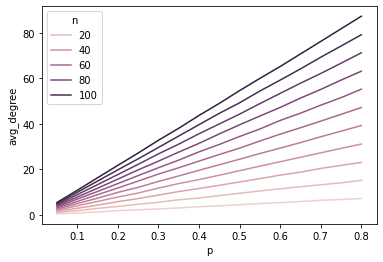

In [431]:
sns.lineplot(data=df, x='p', y='avg_degree',hue='n')

In [351]:
barbasi_avg_degrees = []
erdos_avg_degrees = []
for i in range(100):
    g = barabasi_albert_graph(90, 1)
    barbasi_avg_degrees.append(_get_graph_avg_degree(g))
    
    g2 = erdos_renyi_graph(90, 0.02)
    erdos_avg_degrees.append(_get_graph_avg_degree(g2))

In [352]:
print(f'mean: {np.mean(barbasi_avg_degrees):.03} ;   std: {np.std(barbasi_avg_degrees):.03}')

mean: 1.98 ;   std: 4.44e-16


In [353]:
print(f'mean: {np.mean(erdos_avg_degrees):.03} ;   std: {np.std(erdos_avg_degrees):.03}')

mean: 1.79 ;   std: 0.211


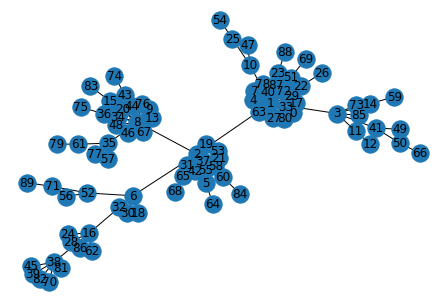

In [350]:
nx.draw(g, with_labels=True)

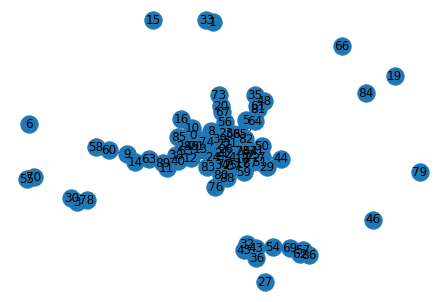

In [443]:
nx.draw(g2, with_labels=True)

In [62]:
REDDIT_MAIN_PATH = join('E:', sep, 'Datasets', 'reddit')
import os
from tqdm import tqdm

In [63]:
users = set()

In [64]:
def _fetch_subreddit_num_users(users, subreddit_name: str):

    # Create a full path of single subreddit edges / vertices csv file
    edges_full_path = join(REDDIT_MAIN_PATH, subreddit_name, f'{subreddit_name}.vertices.csv')

    try:
        df = pd.read_csv(edges_full_path)

    except FileNotFoundError:
        print(f'Could not open {subreddit_name}.vertices.csv... Skipped')
        return

    users |= set(df['__id'])
    
    # free memory
    del df



In [65]:
list_dir = list(os.listdir(REDDIT_MAIN_PATH))

In [66]:
len(list_dir)

20128

In [67]:
for subreddit_name in tqdm(list_dir):
    _fetch_subreddit_num_users(users, subreddit_name=subreddit_name)

 87%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 17497/20128 [11:28<00:57, 46.13it/s]

Could not open The 1970s.vertices.csv... Skipped
Could not open The 1990s.vertices.csv... Skipped
Could not open The 2000s.vertices.csv... Skipped
Could not open The 2013.vertices.csv... Skipped
Could not open The 2022.vertices.csv... Skipped
Could not open The 2112.vertices.csv... Skipped
Could not open The 3000.vertices.csv... Skipped
Could not open The 42000.vertices.csv... Skipped
Could not open The bigbang.vertices.csv... Skipped
Could not open The cretaceous.vertices.csv... Skipped
Could not open The heatdeathoftheuniverse.vertices.csv... Skipped
Could not open The zero.vertices.csv... Skipped


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20128/20128 [13:05<00:00, 25.63it/s]


In [69]:
print(f'{len(users):,}')

19,717,709
